In [2]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install ace_tools
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = 'Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path, sheet_name='Transactions')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [7]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
df.columns.unique()

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

## Store Analysis

In [9]:
# Calculate total revenue per transaction
df['transaction_revenue'] = df['transaction_qty'] * df['unit_price']

# Aggregate revenue by store
store_revenue = df.groupby(['store_id', 'store_location']).agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()

# Rename columns for clarity
store_revenue.rename(columns={
    'transaction_revenue': 'total_revenue',
    'transaction_id': 'total_transactions',
    'transaction_qty': 'total_quantity'
}, inplace=True)

# Calculate average revenue per transaction
store_revenue['avg_revenue_per_transaction'] = store_revenue['total_revenue'] / store_revenue['total_transactions']

# Sort stores by total revenue
top_stores = store_revenue.sort_values(by='total_revenue', ascending=False)

# Identify top-performing stores
print("Top Performing Stores by Revenue:")
print(top_stores)

Top Performing Stores by Revenue:
   store_id   store_location  total_revenue  total_transactions  \
2         8   Hell's Kitchen      236511.17               50735   
0         3          Astoria      232243.91               50599   
1         5  Lower Manhattan      230057.25               47782   

   total_quantity  avg_revenue_per_transaction  
2           71737                     4.661696  
0           70991                     4.589891  
1           71742                     4.814726  


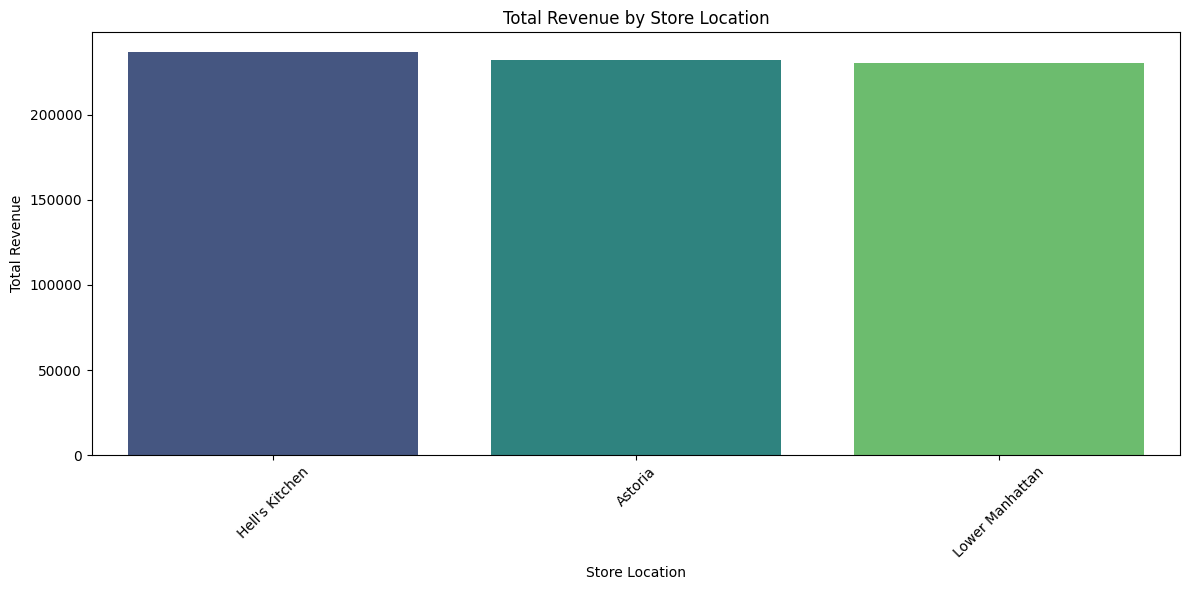

In [10]:
# Plotting highest revenue earning store
plt.figure(figsize=(12, 6))
sns.barplot(x='store_location', y='total_revenue', data=top_stores, palette='viridis')
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Product Sales and Pricing Optimization

In [11]:
# Aggregate revenue and quantity by product category and type
product_performance = df.groupby(['product_category', 'product_type']).agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()

# Calculate average revenue per transaction for products
product_performance['avg_revenue_per_transaction'] = product_performance['transaction_revenue'] / product_performance['transaction_id']

# Display top-performing products by revenue and volume
top_product_revenue = product_performance.sort_values(by='transaction_revenue', ascending=False).head(1)
top_product_volume = product_performance.sort_values(by='transaction_qty', ascending=False).head(1)

print("Product Category and Type contributing most to Revenue:")
print(top_product_revenue[['product_category', 'product_type', 'transaction_revenue']])

print("Product Category and Type contributing most to Sales Volume:")
print(top_product_volume[['product_category', 'product_type', 'transaction_qty']])

Product Category and Type contributing most to Revenue:
  product_category      product_type  transaction_revenue
5           Coffee  Barista Espresso              91406.2
Product Category and Type contributing most to Sales Volume:
   product_category     product_type  transaction_qty
26              Tea  Brewed Chai tea            26250


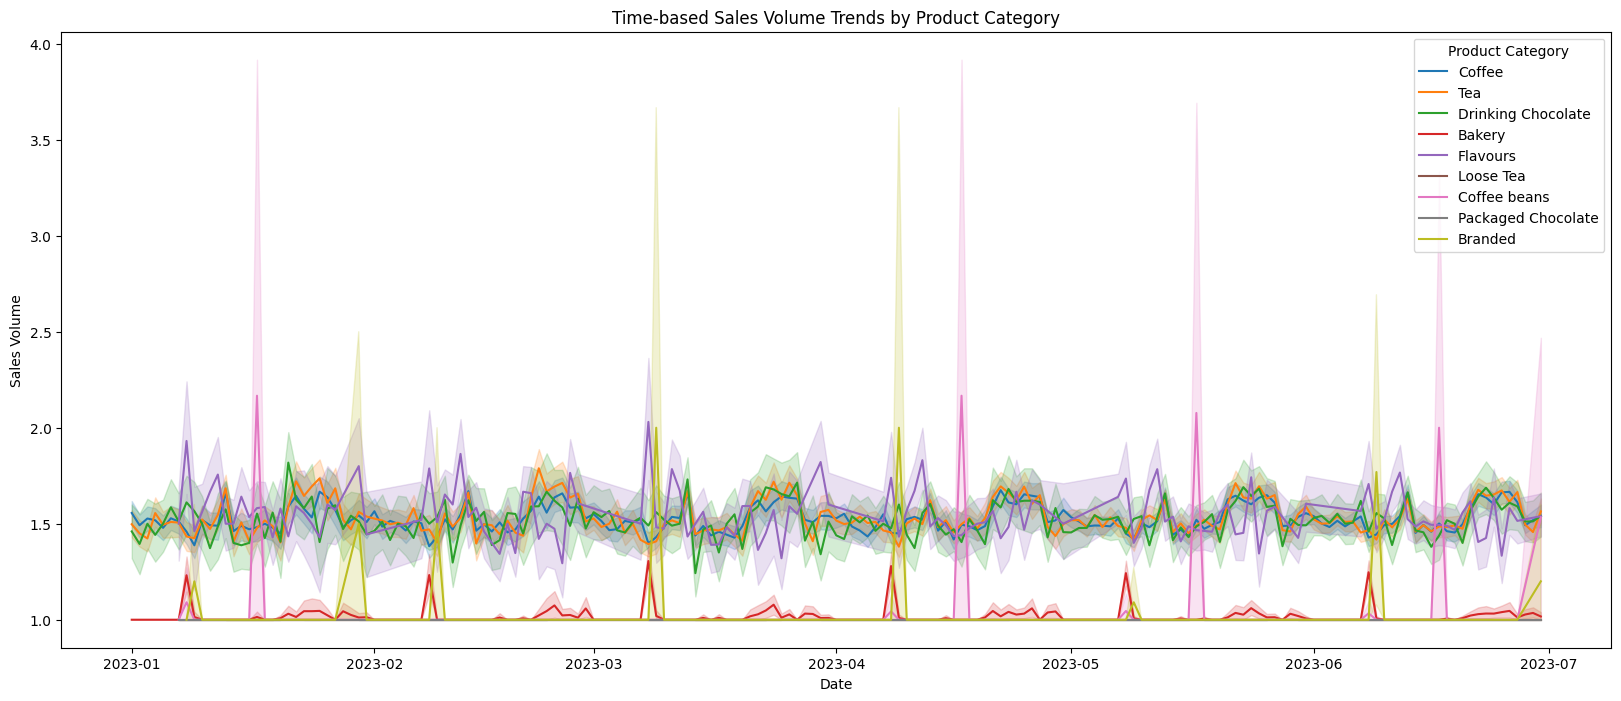

In [12]:
# --- Time-based Sales Trends ---
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month and day for analysis
df['month'] = df['transaction_date'].dt.to_period('M')
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Time-based sales trends - Volume
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='transaction_date', y='transaction_qty', hue='product_category')
plt.title('Time-based Sales Volume Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(title='Product Category')
#plt.tight_layout()
plt.show()

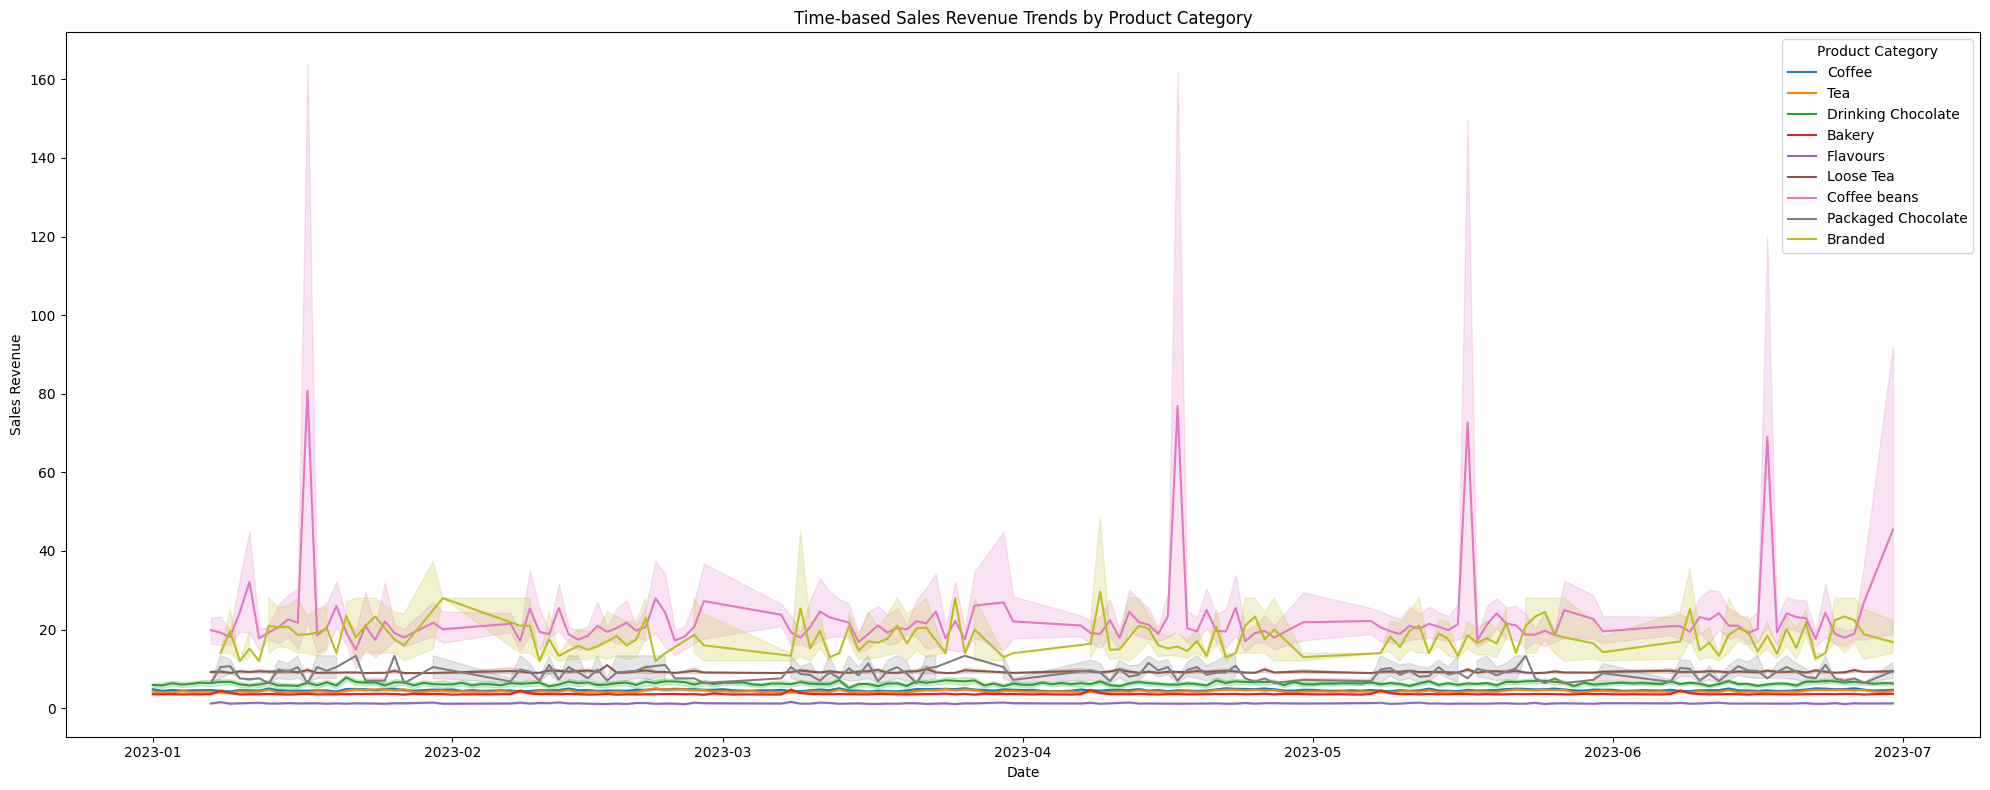

In [13]:
# Time-based sales trends - Revenue
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='transaction_date', y='transaction_revenue', hue='product_category')
plt.title('Time-based Sales Revenue Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

In [14]:
# --- Average Sales per Transaction by Product Category ---
avg_sales_per_category = df.groupby('product_category').agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()
avg_sales_per_category['avg_revenue_per_transaction'] = avg_sales_per_category['transaction_revenue'] / avg_sales_per_category['transaction_id']
avg_sales_per_category['avg_qty_per_transaction'] = avg_sales_per_category['transaction_qty'] / avg_sales_per_category['transaction_id']

print("Average Sales per Transaction by Product Category:")
print(avg_sales_per_category[['product_category', 'avg_revenue_per_transaction', 'avg_qty_per_transaction']])

Average Sales per Transaction by Product Category:
     product_category  avg_revenue_per_transaction  avg_qty_per_transaction
0              Bakery                     3.610969                 1.018337
1             Branded                    18.215529                 1.038822
2              Coffee                     4.621207                 1.527835
3        Coffee beans                    22.866657                 1.042784
4  Drinking Chocolate                     6.314615                 1.522236
5            Flavours                     1.238409                 1.548012
6           Loose Tea                     9.267438                 1.000000
7  Packaged Chocolate                     9.050595                 1.000000
8                 Tea                     4.321458                 1.534401


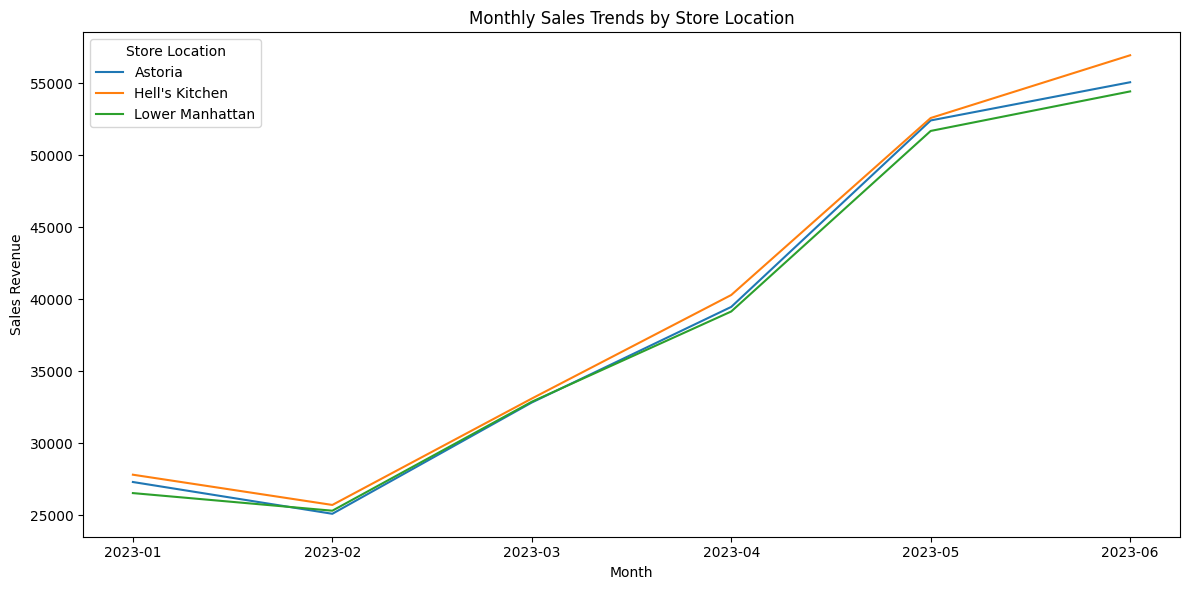

In [15]:
# --- Monthly Sales Trends for Different Stores and Overall ---
monthly_sales_store = df.groupby(['month', 'store_location']).agg({
    'transaction_revenue': 'sum'
}).reset_index()

monthly_sales_store['month'] = monthly_sales_store['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_store, x='month', y='transaction_revenue', hue='store_location')
plt.title('Monthly Sales Trends by Store Location')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.legend(title='Store Location')
plt.tight_layout()
plt.show()

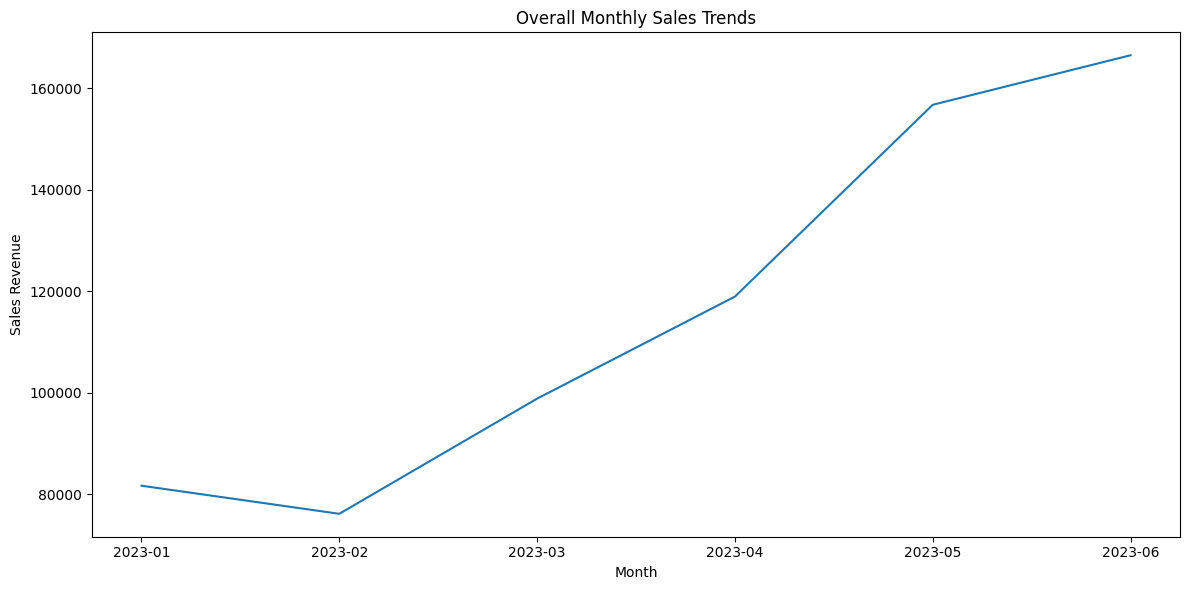

In [16]:
# Overall Monthly Sales Trends
overall_monthly_sales = df.groupby('month').agg({
    'transaction_revenue': 'sum'
}).reset_index()

overall_monthly_sales['month'] = overall_monthly_sales['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=overall_monthly_sales, x='month', y='transaction_revenue')
plt.title('Overall Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.tight_layout()
plt.show()

In [17]:
# --- Average Sales per Transaction ---
avg_sales_per_transaction = df.groupby('product_type').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
avg_sales_per_transaction['avg_revenue'] = avg_sales_per_transaction['transaction_revenue'] / avg_sales_per_transaction['transaction_id']
avg_sales_per_transaction['avg_quantity'] = avg_sales_per_transaction['transaction_qty'] / avg_sales_per_transaction['transaction_id']
print("Average Sales per Transaction:")
print(avg_sales_per_transaction)

Average Sales per Transaction:
             product_type  transaction_revenue  transaction_id  \
0        Barista Espresso             91406.20           16403   
1                Biscotti             19793.53            5711   
2               Black tea              2711.85             303   
3        Brewed Black tea             47932.00           11350   
4         Brewed Chai tea             77081.95           17183   
5        Brewed Green tea             23852.50            5671   
6       Brewed herbal tea             47539.50           11245   
7                Chai tea              4301.25             443   
8                Clothing              6163.00             221   
9      Drinking Chocolate              2728.04             266   
10            Drip coffee             31984.00            8477   
11         Espresso Beans              5560.25             319   
12          Gourmet Beans              6798.00             366   
13  Gourmet brewed coffee             70034.6

In [18]:
df['transaction_date'] = df['transaction_date'].astype(str)
df['transaction_time'] = df['transaction_time'].astype(str)

## Inventory & Operational Efficiency

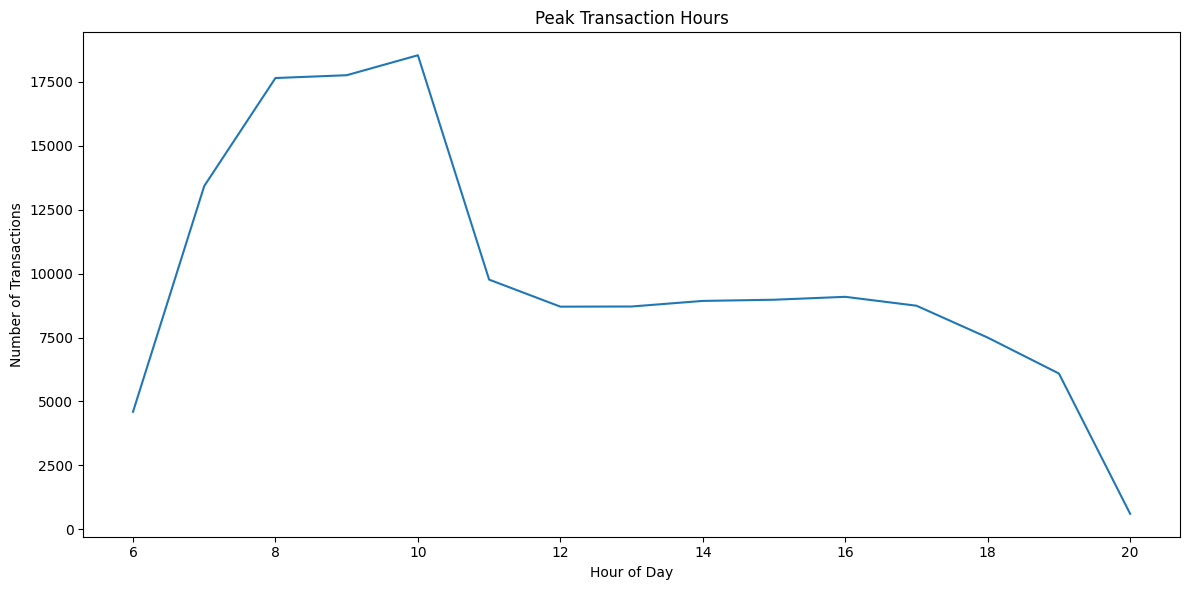

In [19]:
# Convert transaction_date and transaction_time to datetime
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])
df['hour'] = df['transaction_datetime'].dt.hour
df['day_of_week'] = df['transaction_datetime'].dt.day_name()

# Peak transaction hours
hourly_sales = df.groupby('hour').agg({'transaction_id': 'nunique', 'transaction_revenue': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='hour', y='transaction_id')
plt.title('Peak Transaction Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

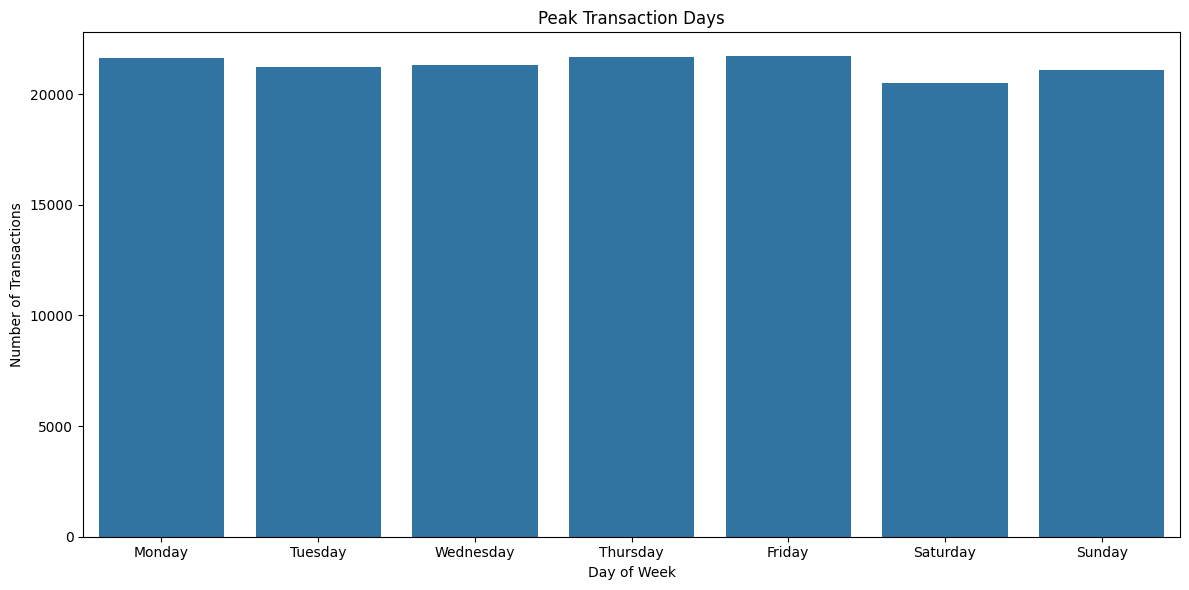

In [20]:
# Peak transaction days
daily_sales = df.groupby('day_of_week').agg({'transaction_id': 'nunique', 'transaction_revenue': 'sum'}).reset_index()
daily_sales['day_of_week'] = pd.Categorical(daily_sales['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
daily_sales = daily_sales.sort_values('day_of_week')

plt.figure(figsize=(12, 6))
sns.barplot(data=daily_sales, x='day_of_week', y='transaction_id')
plt.title('Peak Transaction Days')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

## Basket & Cross-Selling Opportunities

In [28]:
# Group by transaction_time to create baskets
baskets = df.groupby('transaction_time')['product_type'].apply(list)

# Filter out baskets with only one product
filtered_baskets = baskets[baskets.apply(lambda x: len(x) > 1)]

# Debug: Check the number of valid baskets
print(f"Total baskets with more than one product: {filtered_baskets.shape[0]}")

# Generate combinations of different products bought together
combination_list = []
for products in filtered_baskets:
    # Create combinations and exclude same product_type pairs
    unique_combos = [tuple(sorted(pair)) for pair in combinations(products, 2) if pair[0] != pair[1]]
    combination_list.extend(unique_combos)

# Count frequency of each combination
combination_counts = Counter(combination_list)

# Convert to DataFrame for analysis
combo_df = pd.DataFrame(combination_counts.items(), columns=['Product Pair', 'Count']).sort_values(by='Count', ascending=False)

# Remove duplicate pairs (e.g., Tea & Scone vs Scone & Tea)
combo_df['Product Pair'] = combo_df['Product Pair'].apply(lambda x: ' & '.join(sorted(x)))
combo_df = combo_df.groupby('Product Pair').agg({'Count': 'sum'}).reset_index().sort_values(by='Count', ascending=False)

# Display top 10 frequently bought together products
print("Top 10 Frequently Bought Together Products (Different Types):")
print(combo_df.head(10))

Total baskets with more than one product: 24559
Top 10 Frequently Bought Together Products (Different Types):
                                 Product Pair  Count
25           Barista Espresso & Regular syrup  21092
26                   Barista Espresso & Scone  10942
255             Gourmet brewed coffee & Scone   8896
119                   Brewed Chai tea & Scone   8718
27        Barista Espresso & Sugar free syrup   7255
105   Brewed Chai tea & Gourmet brewed coffee   6739
3          Barista Espresso & Brewed Chai tea   6594
115                  Brewed Chai tea & Pastry   6452
12   Barista Espresso & Gourmet brewed coffee   6037
95                   Brewed Black tea & Scone   5990


In [29]:
baskets

transaction_time
06:00:00    [Drip coffee, Drip coffee, Drip coffee, Drip c...
06:00:03    [Brewed herbal tea, Pastry, Brewed herbal tea,...
06:00:05    [Brewed herbal tea, Brewed herbal tea, Brewed ...
06:00:14              [Drip coffee, Drip coffee, Drip coffee]
06:00:20    [Organic brewed coffee, Organic brewed coffee,...
                                  ...                        
20:57:19    [Barista Espresso, Regular syrup, Barista Espr...
20:58:04    [Organic brewed coffee, Organic brewed coffee,...
20:58:35    [Brewed Green tea, Brewed Green tea, Brewed Gr...
20:58:40                                    [Brewed Chai tea]
20:59:32    [Barista Espresso, Sugar free syrup, Barista E...
Name: product_type, Length: 25762, dtype: object

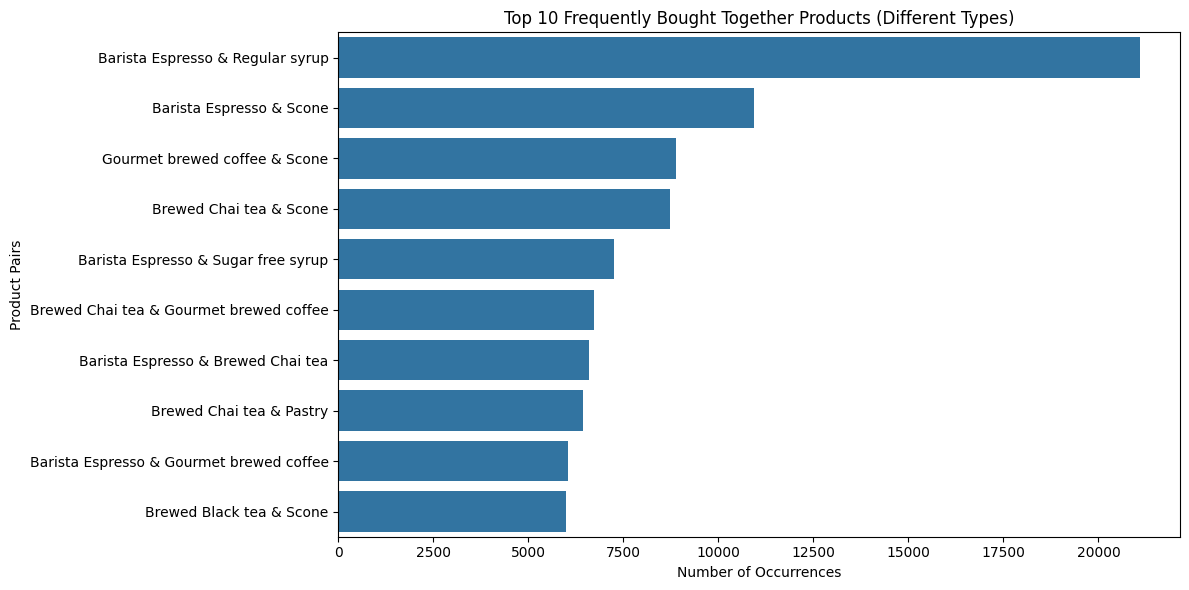

In [27]:
# Plot top 10 frequently bought together products
if not combo_df.empty:
    top_combos = combo_df.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_combos['Count'], y=top_combos['Product Pair'])
    plt.title('Top 10 Frequently Bought Together Products (Different Types)')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Product Pairs')
    plt.tight_layout()
    plt.show()
else:
    print("No different product pairs found with the current grouping method.")

## Part 2: Repeat Transactions

In [22]:
# Combine relevant columns to define unique product transactions
df['product_combination'] = df['product_category'] + " | " + df['product_type'] + " | " + df['product_detail']

# Count how often each product combination is purchased at each store
repeat_transactions = df.groupby(['store_id', 'product_combination']).size().reset_index(name='transaction_count')

# Filter combinations with more than 1 occurrence (i.e., repeats)
repeated_combos = repeat_transactions[repeat_transactions['transaction_count'] > 1]

# Count total repeat transactions per store
store_repeat_counts = repeated_combos.groupby('store_id')['transaction_count'].sum().reset_index().sort_values(by='transaction_count', ascending=False)

# Display stores with high repeat transactions
print("Stores with High Repeat Transactions:")
print(store_repeat_counts)


Stores with High Repeat Transactions:
   store_id  transaction_count
2         8              50735
0         3              50599
1         5              47782


In [42]:
# --- Print Top 10 Most Repeated Product Combinations for Each Store ---
print("\nTop 10 Most Repeated Product Combinations for Each Store:\n")
for store_id in repeated_combos['store_id'].unique():
    top_combos = repeated_combos[repeated_combos['store_id'] == store_id].sort_values(by='transaction_count', ascending=False).head(10)
    print(f"Store ID {store_id}:\n")
    print(top_combos[['product_combination', 'transaction_count']])
    print("\n" + "-"*50 + "\n")


Top 10 Most Repeated Product Combinations for Each Store:

Store ID 3:

                                  product_combination  transaction_count
44  Drinking Chocolate | Hot chocolate | Dark choc...               1166
64              Tea | Brewed Black tea | Earl Grey Rg               1137
69   Tea | Brewed Chai tea | Spicy Eye Opener Chai Lg               1126
78            Tea | Brewed herbal tea | Peppermint Rg               1113
33  Coffee | Gourmet brewed coffee | Columbian Med...               1108
46  Drinking Chocolate | Hot chocolate | Sustainab...               1081
37       Coffee | Gourmet brewed coffee | Ethiopia Sm               1081
67    Tea | Brewed Chai tea | Morning Sunrise Chai Lg               1072
31  Coffee | Drip coffee | Our Old Time Diner Blen...               1063
27                  Coffee | Barista Espresso | Latte               1060

--------------------------------------------------

Store ID 5:

                                   product_combination  tr

In [41]:
# --- Generate a Complete Table for Top 10 Most Repeated Product Combinations per Store ---
top_repeated_combos = repeated_combos.sort_values(by=['store_id', 'transaction_count'], ascending=[True, False]).groupby('store_id').head(5)
output_file = 'Top_Repeated_Product_Combinations.xlsx'
top_repeated_combos.to_excel(output_file, index=False)

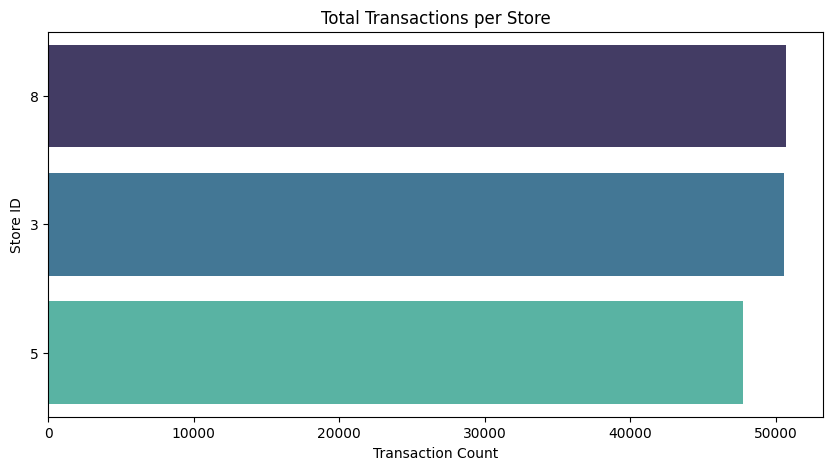

In [35]:
# Create the DataFrame from your data
data = {
    'store_id': [8, 3, 5],
    'transaction_count': [50735, 50599, 47782]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 5))

# Create a horizontal bar chart
sns.barplot(y=df['store_id'].astype(str), x=df['transaction_count'], palette='mako')

# Add labels and title
plt.xlabel("Transaction Count")
plt.ylabel("Store ID")
plt.title("Total Transactions per Store")

# Show the plot
plt.show()

In [31]:
# Plot bar chart for stores with high repeat transactions
plt.figure(figsize=(12, 6))
data_tp = store_repeat_counts.transpose()
sns.barplot(data=data_tp, y='store_id', x='transaction_count', palette='mako')
plt.title("Stores with High Repeat Transactions")
plt.xlabel("Store ID")
plt.ylabel("Number of Repeat Transactions")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `transaction_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

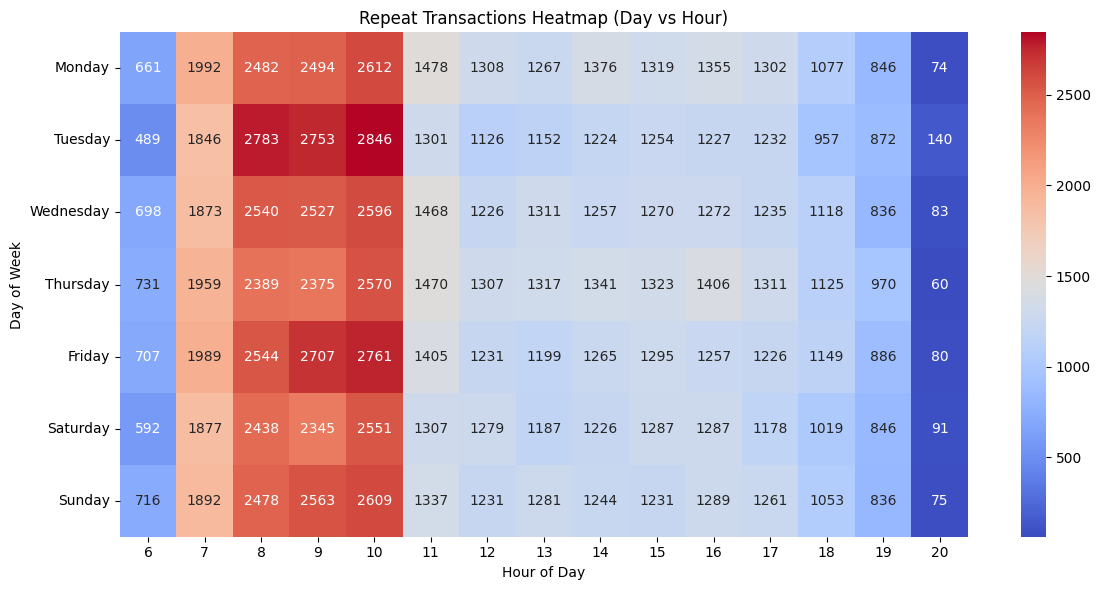

In [24]:
# --- Heatmap: Peak Repeat Transaction Periods ---
# Convert to datetime for time-based analysis
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])
df['day_of_week'] = df['transaction_datetime'].dt.day_name()
df['hour'] = df['transaction_datetime'].dt.hour

# Filter original data for only repeat transactions
repeats_df = df[df.set_index(['store_id', 'product_combination']).index.isin(repeated_combos.set_index(['store_id', 'product_combination']).index)]

# Create heatmap data: Day of week vs. Hour for repeat transactions
heatmap_data = repeats_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title("Repeat Transactions Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()